# Week 1 - Introduction
I'm taking the [Coursera course on machine learning by Andrew Ng](https://www.coursera.org/learn/machine-learning), so this notebook is to document my progress through the course.

The course uses Octave, an open source version of Matlab. I'm going to try to use Python for this instead.

The topics discussed during this week are:
* Introduction to Machine Learning
* Linear Regression with One Variable
* Linear Algebra

## Introduction
Machine learning (ML) recently grew out of work in artificial intelligence (AI) and began to be used to automate processes such as photo tagging or web searches.
Some modern examples include:
* database mining
  - web click data, medical records
* applications we can't program by hand
  - autonomous helicopter, handwriting recognition, natural language processing, computer vision
* self-customizing programs
  - Amazon preferences, Netflix recommendations
* understanding human learning

### What is Machine Learning?
Arthur Samuel (1959): Machine learning is the field of study that gives computers the ability to learn without being explicity programmed. Arthur Samuel's claim to fame was to create a checkers playing program to learned how to win games of checkers by learning how.

A more modern definition by Tom Mitchell (1998): A computer program is said to learn from experience E with respect to some task T and some performance measure P, if its performance on T, as measured by P, improves with experience E.

In the checkers example:
* E is the experience of playing checkers thousands of times
* T is the task of playing checkers
* P is the probability of winning the game of checkers

There are two main types of ML algorithms:
1. Supervised learning
2. Unsupervised learning
There are others, such as reinforcement learning or recommender systems.

### Supervised Learning
An example: housing price prediction given price points for several houses of different square footages. You could fit a line or a polynomial to the data.

The term supervised learning emphasizes that we've given the algorithm the "right answers". The example for the housing prediction is a *regression* problem. Here, you have continuous data for various values.

Another example: prediction if breast cancer is malignant or benign. Suppose in a dataset you have the size of a tumor and if the cancer was malignant or benign. This is a discrete dataset, since the cancer is either malignant or benign. This is a *classification* problem. If you have a tumor of a certain size, you want to predict whether it's benign or malignant. You may also have other variables aside from tumor size, such as age. So this classification may need to separate age and tumor size discretely to predict the cancer classification. The more features you can use, the better your classification will be.

**Note**: We use classification in remote sensing to determine the land-use class in imagery. For supervised learning, you have to provide training data for the different classes you want to identify. The more training data the better, and the more classes the better.

### Unsupervised Learning
Unsupervised learning is different in that the algorithm is asked to perform on data that comes *without* the right answer.

Google does this with clustering algorithms to cluster different results so that when you search, the algorithm gives a relevant "cluster" of results.

Another example is in genomics. If we have DNA data from different individuals, we can see to what degree certain genes are expressed. A clustering algorithm can identify different types of gene expressions, like eye color.

**Note**: We use classification in remote sensing to determine the land-use class in imagery. For unsupervised learning, you *do not* provide training samples. Instead, you might specify how many classes you want the algorithm to identify, and it will return classes based on things like sizes or spectral profiles.

#### The cocktail party problem
You have a party. Say there are two people talking with two different microphones. So the microphones are at different positions relative to the two speakers, but both microphones will record both of the speakers. Of course the microphones will record the speakers at different volumes. An unsupervised learning algorithm can be used to separate the two speakers distinctly so there is no overlapping audio. This is done with singular value decomposition (SVD), a linear algebra concept.

## Model and Cost Function
To begin, we're going back to the house pricing example. Suppose we have several data points of house prices and the square footages. This set of data we have is called a *training set*. 

Some notation we'll be using:
* $m$: number of training examples
* $x$: input variable/features
* $y$: output variable / target features
* $h$: hypothesis/function that maps $x$ to $y$
* $\theta_i$:  parameters used in $h$
* $(x,y)$: represent a single training sample
* $(x^{(i)},y^{(i)})$: the $i$th training sample, or the $i$th row in the dataset

The training set is fed to the supervised learning algorithm to test a hypothesis. In our case here the input, is the size of the house the hypothesis is a function that maps the size of the house to the estimated price. We can have linear regressions. This example is a univariate linear regression, but we can have more complicated functions as well.  We'll see this written sometimes as (for a linear regression model):

$$h_\theta(x) = \theta_0 + \theta_1 x$$

### Cost Function
The parameters used in the hypothesis are chosen such that the function is closes to the output in the training samples. The goal is to minimize the following:

$$J(\theta_0,\theta_1) = \frac{1}{2 m} \sum_{i=1}^m \Big(h_\theta(x^{(i)}) - y^{(i)} \Big)^2$$

This is known as our *cost function*. To do so, we find the values of the parameters that minimize the above equation. This is formally written as 

$$\min_{\theta_0,\theta_1} J(\theta_0,\theta_1)$$

We use the *squared* error function in the cost function to normalize differences both above and below the training samples. There are other cost functions we can use as well.

#### A simple example
Let's look at a simplified example where:

$$h_\theta(x) = \theta_1 x$$

In other words,

$$\theta_0 = 0$$

If our training data is 

| x   | y   |
| --- | --- |
| 1   | 1   |
| 2   | 2   |
| 3   | 3   |

and we take the parameter to be

$$\theta_1 = 1$$

then we have the cost function

$$
\begin{align}
J(\theta_1) & = J(1) \\
& = \frac{1}{6} \sum_{i=1}^3 \Big( (1-1)^2 + (2-2) ^2 + (3-3)^2 \Big)^2 \\
& = \frac{0}{6} \\
& = 0
\end{align}
$$

Now let's look at the parameter set to

$$\theta_1 = 0.5$$

So the cost function here is 

$$
\begin{align}
J(0.5) & = \frac{1}{6} \sum_{i=1}^3 \Big( (0.5 - 1)^2 + (1-2) ^2 + (1.5-3)^2 \Big)^2 \\
& = \frac{3.5}{6} \\
& = 0.58
\end{align}
$$

Now let's look at the parameter set as 

$$\theta_1 = 0$$

So the cost function here is 

$$
\begin{align}
J(0) & = \frac{1}{6} \sum_{i=1}^3 \Big( (0 - 1)^2 + (0-2) ^2 + (0-3)^2 \Big)^2 \\
& = \frac{14}{6} \\
& = 2.33
\end{align}
$$

We can continue calculating more and more values, and it looks like a positive-definite parabola, minimized at 

$$\theta_1 = 1.$$ 

Our objective was to minimize the cost function, so this is indeed our possible linear model.

**Note**: Minimizing the cost function does not guarantee ultimate success of the linear model unless your training set contains all possible values. If this were true you wouldn't need to create a supervised learning model in the first place since you already know all of the information. For example, maybe the observed values in between 1 and 2 or 2 and 3 oscillate wildly. Our limited three point training sample here doesn't cover that, though, so we'd miss that behavior even with a minimized cost function. Additionally, perhaps the observed values are really exponential on a large scale, but appears linear at such a small that the training set covers. In this case, a linear regression eventually fits quite poorly. So you really need to maximize your training data points as much as feasible and ensure the assumption your making in your hypothesis is correct (e.g., that the relationship between the input and output is linear).


#### Cost function intuition
It turned out that our single parameter cost function resembled a parabola. When we examine the linear model with our *two* parameters, the plot will be a *paraboloid*. It still has a minimum at one point. In a contour plot, the horizontal axes are the values of the parameters, and the vertical axis is the value of the cost function. Below is a bit of code and to produce such a paraboloid for some known cost function, both as a surface plot and a contour plot.

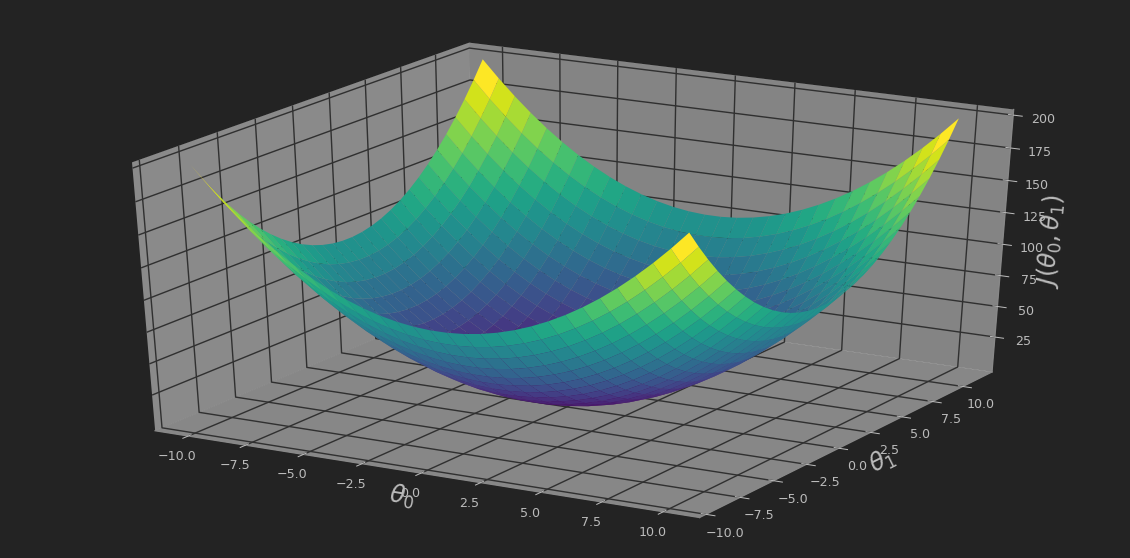

In [3]:
# Create a simple paraboloid surface plot from matplotlib
def f(x,y):
    return x**2 + y**2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from jupyterthemes import jtplot
jtplot.style(theme='monokai',context='notebook',ticks=True,grid=False)
fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection='3d')
x = np.linspace(-10, 10, 30)
y = np.linspace(-10, 10, 30)+1
X, Y = np.meshgrid(x, y)
Z = f(X,Y-1)
ax.set_xlabel(r'$\theta_0$',fontsize=24);
ax.set_ylabel(r'$\theta_1$',fontsize=24);
ax.set_zlabel(r'$J(\theta_0,\theta_1)$',fontsize=24);
ax.plot_surface(X, Y, Z,cmap='viridis');

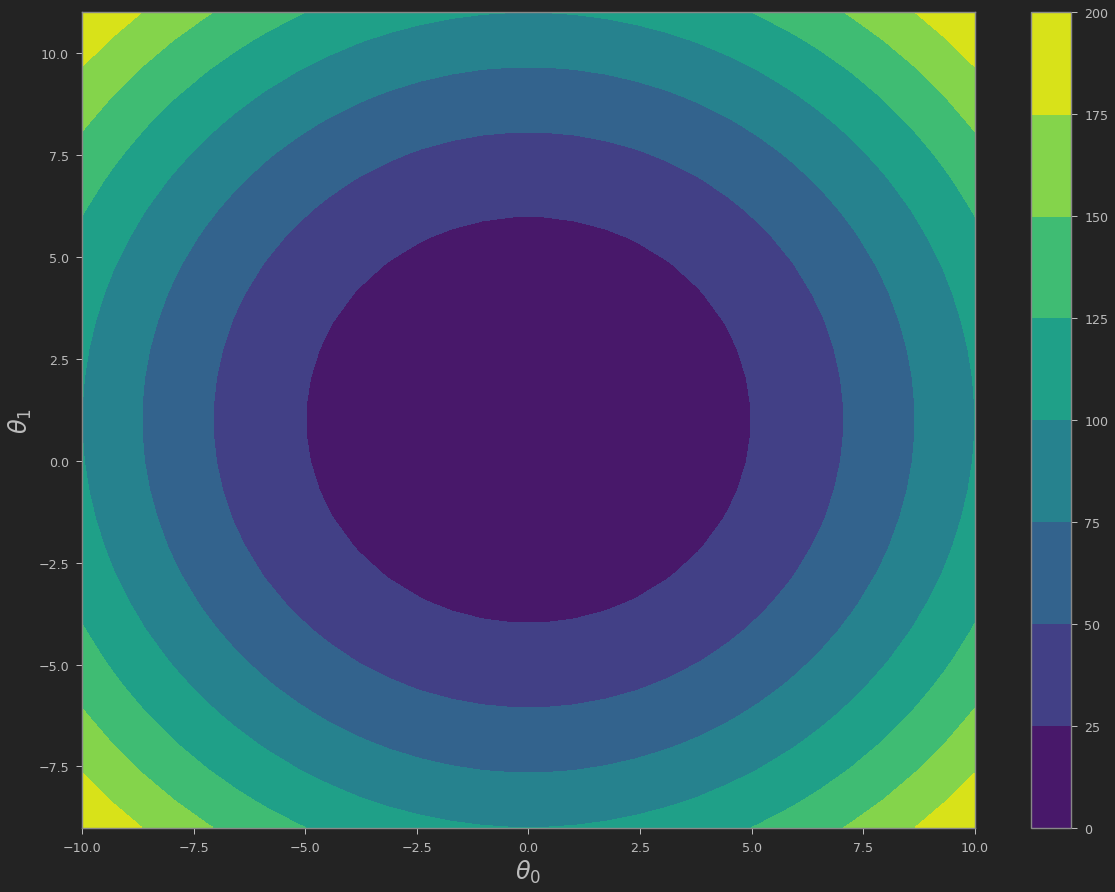

In [4]:
# Now create a suface plot
fig = plt.figure(figsize=(20,15))
ax = plt.axes()
ax.set_xlabel(r'$\theta_0$',fontsize=24);
ax.set_ylabel(r'$\theta_1$',fontsize=24);
contour = ax.contourf(X, Y, Z,cmap='viridis');
cbar = plt.colorbar(contour,ax=ax);

## Gradient Descent
We can algorithmically find the minimum of the cost function using the gradient descent method. In general, this concept can be applied for more than just bi-variate functions. The outline is to
1. start with some $\theta_0$, $\theta_1$
2. iteratively change $\theta_0$, $\theta_1$ to reduce $J$ until we hopefully reach a minimum.

Imagine standing on the side of a hill. You want to continue walking downhill until you  no longer can descend any further. This is moving down the gradient.  If there are multiple local minima, where you end up by moving down the gradient depends on where you began, and you may not finish at the absolute minima.

The algorithm looks as such (where $:=$ denotes *assignment*:

$$
\theta_j := \theta_j - \alpha \frac{\partial}{\partial \theta_j} J(\theta_0,\theta_1) \text{ for } j=1,2
$$

and this is repeated until convergence and $\alpha$ is the learning rate which controlls how big of a step down the gradient we take.

*Simultaneously*, you need to update both parameters in the following manner, programatically:

$$
\begin{align}
\texttt{temp0} & = \theta_0 - \alpha \frac{\partial}{\partial \theta_0} J(\theta_0,\theta_1) \\
\texttt{temp1} & = \theta_1 - \alpha \frac{\partial}{\partial \theta_1} J(\theta_0,\theta_1) \\
\theta_0 & = \texttt{temp0} \\
\theta_1 & = \texttt{temp1}
\end{align}
$$

The subtraction in the mathematical definition ensures that we are taking a step *down* the gradient of the cost function. 

The learning rate can possibly be too small or too large. If it's too small, it will take a large number of steps to get to the minimum of the cost function. If it's too large, the gradient descent may overshoot the minimum. In this case, it may fail to converge or even diverge. 

Additionally, if the initial guess for the parameter is already at a local extremum, the partial derivitive of the cost function will be zero and thus the gradient decent will not change the value of the parameter.

Also note that as the gradient descent approaches the local minimum, since the step size is proportional to the partial deriviative, the step sizes will decrease. Thus, there is no need to decrease the learning rate as the gradient descent approaches the local minimum.

### Gradient Descent for Linear Regression
Here we apply the gradient descent to our linear regression cost function. Recall the cost function formula:

$$
J(\theta_0,\theta_1) = \frac{1}{2 m} \sum_{i=1}^m \Big(h_\theta(x^{(i)}) - y^{(i)} \Big)^2
$$

where

$$
h_\theta(x) = \theta_0 + \theta_1 x
$$

Now let's apply the derivatives:

$$
\begin{align}
\frac{\partial}{\partial \theta_j} J(\theta_0,\theta_1) &= \frac{\partial}{\partial \theta_j} \Bigg( \frac{1}{2 m} \sum_{i=1}^m \Big(h_\theta(x^{(i)}) - y^{(i)} \Big)^2 \Bigg) \\
& = \frac{\partial}{\partial \theta_j} \Bigg( \frac{1}{2 m} \sum_{i=1}^m \Big(\theta_0 + \theta_1 x^{(i)} - y^{(i)} \Big)^2 \Bigg)
\end{align}
$$

For the $j=0$ case,

$$
\frac{\partial}{\partial \theta_0} J(\theta_0,\theta_1) = \frac{1}{m} \sum_{i=1}^m \Big(h_\theta(x^{(i)}) - y^{(i)} \Big)
$$

and for the $j=1$ case,

$$
\frac{\partial}{\partial \theta_1} J(\theta_0,\theta_1) = \frac{1}{m} \sum_{i=1}^m \Big(h_\theta(x^{(i)}) - y^{(i)} \Big) \cdot x^{(i)}
$$

So now we can update our gradient descent algorithm:

$$
\begin{align}
\theta_0 & := \theta_0 - \frac{\alpha}{m} \sum_{i=1}^m \Big(h_\theta(x^{(i)}) - y^{(i)} \Big) \\
\theta_1 & := \theta_1 - \frac{\alpha}{m} \sum_{i=1}^m \Big(h_\theta(x^{(i)}) - y^{(i)} \Big) \cdot x^{(i)}
\end{align}
$$

which again will be iterated until convergence.

We discussed before the issue of starting at a maximum or ending in the wrong local minima, but when the cost function is for a linear regression, it's a convex paraboloid! This means that there's only one minimum and no maximum, so we don't have to worry about these problems. 

This is also sometimes called Batch Gradient Descent. The term "batch" refers to the fact that we are performing our summation on *all* of the training samples in the training data set.

## Linear Algebra Review
A matrix is a rectangular array of numbers, with dimensions written as the number of rows by the number of columns. Some examples:

$$
A = 
\begin{bmatrix}
1 & 2 & 3\\
4 & 5 & 6
\end{bmatrix}
$$

a 2 $\times$ 3 matrix, or

$$
B = 
\begin{bmatrix}
1402 & 191 \\
1371 & 821 \\
949 & 1437 \\
147 & 1448
\end{bmatrix}
$$

a 4 $\times$ 2 matrix. If we write

$$ 
A_{i,j}
$$

we are referring to element in the $i$th row, $j$th column of the matrix. We'll sometimes refer to the set of all $m \times n$ matrices as $\mathbb{R}^{m \times n}$.

A vector is a one-dimensional matrix, such as 

$$
a = 
\begin{bmatrix}
460 \\
232 \\
315 \\
178
\end{bmatrix}
$$

To refer to the $i$th element of a vector, we'll write

$$
a_i
$$

We'll also sometimes refer to the set of all $n \times 1$ vectors as $\mathbb{R}^{n}$. 

We'll now have a look at how Python handles matricies. Note that python begins indexing at 0.

In [3]:
import numpy as np

# Create a matrix and vector
A = np.matrix([[1,2,3],[4,5,6],[7,8,9]])
a = np.matrix([1,2,3,4,5])

# Print some things about the matrix
print("Matrix A =")
print(A)
print("")
print("A_2,3 =",A[1,2])
print("")
print("Number of elements in A =",A.size)
print("")
print("Shape of A =",A.shape)
print("")

# Print some things about the vector
print("Vector a =")
print(a)
print("")
print("a_4 =",a[0,3])
print("")
print("Number of elements in a =",a.size)
print("")
print("Shape of a =",a.shape)
print("")

Matrix A =
[[1 2 3]
 [4 5 6]
 [7 8 9]]

A_2,3 = 6

Number of elements in A = 9

Shape of A = (3, 3)

Vector a =
[[1 2 3 4 5]]

a_4 = 4

Number of elements in a = 5

Shape of a = (1, 5)



### Matrix Addition and Scalar Multiplication
To add or subtract matrices, the matrices must both be of the same size, and you simply add together the matching elements such that

$$
C_{i,j} = A_{i,j}+B_{i,j}
$$

To multiply a scalar by a matrix, you simply carry the multiplication throughout each of the matrix elements.

Let's see how the code works out:

In [4]:
import numpy as np

# Create 2 matrices and a scalar
A = np.matrix([[1,2,3],[4,5,6],[7,8,9]])
B = np.matrix([[2,2,2],[4,4,4],[6,6,6]])
s = -2

# Show the result of adding the matrices
print("A + B =")
print(A+B)
print("")

# Show the result of subtracting the matrices
print("A - B =")
print(A-B)
print("")

# Show the result of multiplying matrix by the scalar
print("s * A =")
print(s*A)
print("")

# Show the result of dividing matrix by the scalar
print("B / s =")
print(B/s)
print("")

# Show the result of dividing matrix by the scalar
print("A + s =")
print(A+s)
print("")

A + B =
[[ 3  4  5]
 [ 8  9 10]
 [13 14 15]]

A - B =
[[-1  0  1]
 [ 0  1  2]
 [ 1  2  3]]

s * A =
[[ -2  -4  -6]
 [ -8 -10 -12]
 [-14 -16 -18]]

B / s =
[[-1. -1. -1.]
 [-2. -2. -2.]
 [-3. -3. -3.]]

A + s =
[[-1  0  1]
 [ 2  3  4]
 [ 5  6  7]]



### Matrix-Vector Multiplication
Matrix multiplication is a bit more difficult. First, the number of columns of the first matrix must match the number of rows in the second matrix. Thus, matrix multiplication is no commutative. Let's first start with matrix-vector multiplication. 

For a $m \times n$ matrix $A$ multiplied by an $n \times 1$ vector, you'll get a $m \times 1$ vector back, where

$$
y_i = A_{i,1} x_1 + A_{i,2} x_2 + \cdots + A_{i,n} x_n
$$

Let's see some examples:

#### Symbolic example
Let's look at A, a 3 $\times$ 2 matrix muliplied by B, a 2 $\times$ 1 vector.

$$
\begin{bmatrix}
A_{1,1} & A_{1,2} \\
A_{2,1} & A_{2,2} \\
A_{3,1} & A_{3,2}
\end{bmatrix}
\begin{bmatrix}
b_{1,1} \\
b_{2,1}
\end{bmatrix}
=
\begin{bmatrix}
A_{1,1} b_{1,1} + A_{1,2} b_{2,1} \\
A_{2,1} b_{1,1} + A_{2,2} b_{2,1} \\
A_{3,1} b_{1,1} + A_{3,2} b_{2,1} 
\end{bmatrix}
$$

So it works out the the inner two dimension sizes must match, and the result is the size of the outer dimensions of the two matrices.

#### Numeric example
We'll use two matrices now of the same size as the previous example

$$
\begin{bmatrix}
1 & 3 \\
4 & 0 \\
2 & 1
\end{bmatrix}
\begin{bmatrix}
1 \\
5
\end{bmatrix}
=
\begin{bmatrix}
1 + 15 \\
4 + 0 \\
2 + 5
\end{bmatrix}
= 
\begin{bmatrix}
16 \\
4 \\
7 \\
\end{bmatrix}
$$

#### Putting together equations
Let's go back to our house examples. Say we have 4 sizes, in square feet: 2104, 1416, 1534, and 852. The linear function that best fit was found to be

$$
h_\theta (x) = -40 + 0.25 x
$$

We can write the following matrices to calculate the predicted prices from the best by doing a matrix multiplication as such:

$$
\begin{bmatrix}
1 & 2104 \\
1 & 1416 \\
1 & 1534 \\
1 & 852
\end{bmatrix}
\begin{bmatrix}
-40 \\
0.25
\end{bmatrix}
$$

Now let's look at some code.

In [5]:
import numpy as np

# Create a matrix and vector
A = np.matrix([[1,2,1,5],[0,3,0,4],[-1,-2,0,0]])
b = np.matrix([[1],[3],[2],[1]])

print("A = ")
print(A)
print("")
print("A shape =",A.shape)
print("")
print("b = ")
print(b)
print("")
print("b shape =",b.shape)
print("")
print("A*b =")
print(np.dot(A,b))

print("")
print("======")
print("")

# Create a matrix and vector
A = np.matrix([[1,0,3],[2,1,5],[3,1,2]])
b = np.matrix([[1],[6],[2]])

print("A = ")
print(A)
print("")
print("A shape =",A.shape)
print("")
print("b = ")
print(b)
print("")
print("b shape =",b.shape)
print("")
print("A*b =")
print(np.dot(A,b))

A = 
[[ 1  2  1  5]
 [ 0  3  0  4]
 [-1 -2  0  0]]

A shape = (3, 4)

b = 
[[1]
 [3]
 [2]
 [1]]

b shape = (4, 1)

A*b =
[[14]
 [13]
 [-7]]


A = 
[[1 0 3]
 [2 1 5]
 [3 1 2]]

A shape = (3, 3)

b = 
[[1]
 [6]
 [2]]

b shape = (3, 1)

A*b =
[[ 7]
 [18]
 [13]]


### Matrix-Matrix Multiplication
For matrix-matrix multiplication, you simply break apart the matrices into separate vectors to calculate the resulting elements of the product matrix. For example, take the matrix multiplication

$$
\begin{bmatrix}
1 & 3 & 2 \\
4 & 0 & 1
\end{bmatrix}
\begin{bmatrix}
1 & 3 \\
0 & 1 \\
5 & 2
\end{bmatrix}
$$

For the resulting product matrix, we simply break the second matrix one column at a time and perform the matrix-vector calculations, then put the resulting vectors together to get the final result. For the above example, for the first column we have

$$
\begin{bmatrix}
1 & 3 & 2 \\
4 & 0 & 1
\end{bmatrix}
\begin{bmatrix}
1 \\
0 \\
5
\end{bmatrix}
=
\begin{bmatrix}
11 \\
9 
\end{bmatrix}
$$

and for the second column we have

$$
\begin{bmatrix}
1 & 3 & 2 \\
4 & 0 & 1
\end{bmatrix}
\begin{bmatrix}
3 \\
1 \\
2
\end{bmatrix}
=
\begin{bmatrix}
10 \\
14 
\end{bmatrix}
$$

so the resulting product is

$$
\begin{bmatrix}
1 & 3 & 2 \\
4 & 0 & 1
\end{bmatrix}
\begin{bmatrix}
1 & 3 \\
0 & 1 \\
5 & 2
\end{bmatrix}
=
\begin{bmatrix}
11 & 10 \\
9 & 14 
\end{bmatrix}
$$

To multiply two matrices, they must have the appropriate dimensions. The following must be true:

$$
\underset{m \times n}{A} \times \underset{n \times o}{B} = \underset{m \times o}{C}
$$

#### Putting together equations
As before, we can put together our linear regression hypothesis calculations into matrix. This time, instead of having *one* hypothesis, suppose we have three:

$$
\begin{align}
h_\theta (x) & = -40 + 0.25 x \\
h_\theta (x) & = 200 + 0.1 x \\
h_\theta (x) & = -150 + 0.4 x \\
\end{align}
$$

and again we have some house sizes we want to predict the price of based on our hypotheses: 2104, 1416, 1534, 852 sq. ft. We can build the following matrix multiplication to compute the prices for each of the three hypothesis.

$$
\begin{bmatrix}
1 & 2104 \\
1 & 1416 \\
1 & 1534 \\
1 & 852
\end{bmatrix}
\begin{bmatrix}
-40 & 200 & -150 \\
0.25 & 0.1 & 0.4
\end{bmatrix}
=
\begin{bmatrix}
486 & 410 & 692 \\
314 & 342 & 416 \\
344 & 353 & 464\\
173 & 285 & 191
\end{bmatrix}
$$

where each of the colums correspond to the three separate hypotheses, and the four rows correspond to the house sizes provided.

Let's see some matrix multiplication in Python.

In [6]:
import numpy as np

# Create two matrices
A = np.matrix([[1,3],[2,5]])
B = np.matrix([[0,1],[3,2]])

print("A = ")
print(A)
print("")
print("A shape =",A.shape)
print("")
print("B = ")
print(B)
print("")
print("B shape =",B.shape)
print("")
print("A*B =")
print(A*B)
print("")
print("A*B shape =",(A*B).shape)
print("")
print("B*A =")
print(B*A)
print("")
print("B*A shape =",(B*A).shape)

A = 
[[1 3]
 [2 5]]

A shape = (2, 2)

B = 
[[0 1]
 [3 2]]

B shape = (2, 2)

A*B =
[[ 9  7]
 [15 12]]

A*B shape = (2, 2)

B*A =
[[ 2  5]
 [ 7 19]]

B*A shape = (2, 2)


### Matrix Multiplication Properties
There are many different properties of matrix multiplication that are not the same as for scalars. For example, matrix multiplication is not commutative, that is,

$$
A \times B \neq B \times A
$$

This is shown in the example code above. The dimensions of the product matrix can even change be reversing the product order.

Matrix multiplication however *is* associative. That is

$$
A \times ( B \times C ) = (A \times B) \times C
$$

Just like in scalar multiplication, there is an identity multiplication. In scalar multiplication,

$$
1 \cdot s = s
$$

In matrices, the identity is a matrix with zeroes everywhere except for ones along the diagonal, such as

$$
I_{3 \times 3} = 
\begin{bmatrix}
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1
\end{bmatrix}
$$

The identity matrix multiplication of a vector will return the vector being multiplied:

$$
A \times I = I \times A = A
$$

And of course, the matrix dimensions must match.

### Matrix Inverse
In the set of real numbers, a number has an inverse (aside from 0) such that the product of a number and its inverse is 1. In matrix world, a matrix has an inverse such that

$$
A \times A^{-1} = A^{-1} A = I
$$ 

Note that this is can only true for a *square* matrix; that is, the number of rows is equivalent ot the number of columns. And in fact, not all square matrices have inverses. We won't get into that now. We call matrices that *do not* have an inverse "singular". Calculating the matrix inverse is a bit involved, especially for large matrices. But we have code! So let's use that to see how it works.

In [7]:
import numpy as np

# Create a matrix
A = np.matrix([[3,4],[2,16]])

# Calculate the inverse
inverseA = A**(-1)

print("A = ")
print(A)
print("")
print("A shape =",A.shape)
print("")
print("A inverse = ")
print(inverseA)
print("")
print("A inverse shape =",inverseA.shape)
print("")
print("A*A inverse =")
print(A*inverseA)

A = 
[[ 3  4]
 [ 2 16]]

A shape = (2, 2)

A inverse = 
[[ 0.4   -0.1  ]
 [-0.05   0.075]]

A inverse shape = (2, 2)

A*A inverse =
[[1. 0.]
 [0. 1.]]


### Matrix Transpose
To form a matrix transpose, we simply flip the elements of a matrix such that if

$$
B = A^T
$$

then

$$
B_{i,j} = A_{j,i}
$$

For completeness, let's also look at the code for this.

In [8]:
import numpy as np

# Create a matrix
A = np.matrix([[3,4],[2,16]])

# Calculate the inverse
transposeA = A.transpose()

print("A = ")
print(A)
print("")
print("A shape =",A.shape)
print("")
print("A transpose = ")
print(transposeA)
print("")
print("A transpose shape =",transposeA.shape)

A = 
[[ 3  4]
 [ 2 16]]

A shape = (2, 2)

A transpose = 
[[ 3  2]
 [ 4 16]]

A transpose shape = (2, 2)
